In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Intro

Dataset ini berisikan tentang data review dari kategori NightCream yang diambil dari forum review FemaleDaily dengan proses scraping (18-Sep-2020) <br>

1. **Username** - Reviewer username
2. **SkinCond_Age** - Kondisi wajah & umur reviewer
4. **Recommend** - Apakah Reviewer merekomendasikan produk/tidak
5. **PostDate** - Tanggal review dipost oleh reviewer
6. **Review** - Isi review dari produk
7. **Rating** - Rating produk yang diberikan oleh reviewer



# Import Data

In [5]:
review = pd.read_csv(r'D:\FinalProject\DataBase\Input\01. SkincareReview.csv')
review

,Brand,Product,UserName,SkinCond_Age,Recommend,PostDate,Review,Rating
0,Hada Labo,Perfect 3D Gel,saffanazian,"Oily, 19 - 24",saffanazian recommends this product!,15 hours ago,"udah pake 6 botol , teksturnya unik lebih kaya...",5
1,Hada Labo,Perfect 3D Gel,nadh_,"Normal, 19 - 24",nadh_ recommends this product!,a day ago,Aku pake ini buat night creamku. Ini bener2 bi...,5
2,Hada Labo,Perfect 3D Gel,Ismawf,18 and Under,Ismawf doesn't recommend this product!,2 days ago,Sya cocok sama semua produk hadalabo tapi kecu...,3
3,Hada Labo,Perfect 3D Gel,denishaap,"Normal, 19 - 24",denishaap recommends this product!,3 days ago,alhamdulillah cocok xx dikulitku yang suka rew...,5
4,Hada Labo,Perfect 3D Gel,kifa,"Combination, 30 - 34",kifa recommends this product!,10 Sep 2020,iseng beli nyobain ini dan wowww bekas jerawat...,4
...,...,...,...,...,...,...,...,...
7631,Clinelle,Whiten Up Brightening Night Cream,janejen,"Oily, 18 and Under",janejen recommends this product!,15 Oct 2019,Beli ini gara gara di rekomendadi mba mba guar...,4
7632,Clinelle,Whiten Up Brightening Night Cream,septianalaras,"Combination, 19 - 24",septianalaras recommends this product!,12 Oct 2019,awalnya ragu coba karena harganya di atas budg...,4
7633,Clinelle,Whiten Up Brightening Night Cream,Finatulh,"Normal, 19 - 24",Finatulh recommends this product!,08 Oct 2019,"pake ini barengan sama day creamnya, pake male...",5
7634,Clinelle,Whiten Up Brightening Night Cream,indahsario,"Dry, 19 - 24",NaN,24 Sep 2019,Aku nyoba ini dari sample size tapi langsung j...,4


# Data Cleaning & Exploratory

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         7636 non-null   object
 1   Product       7636 non-null   object
 2   UserName      7636 non-null   object
 3   SkinCond_Age  7588 non-null   object
 4   Recommend     4212 non-null   object
 5   PostDate      7636 non-null   object
 6   Review        7636 non-null   object
 7   Rating        7636 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 477.4+ KB


In [7]:
review.describe()

,Rating
count,7636.000000
mean,3.887899
std,1.120041
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Data cleaning for columns **SkinCond_Age, Recommend, PostDate**

**1. Breakdown SkinCond_Age into columns SkinCond and Age**

In [8]:
def skincond(df):
    try:
        cond = df['SkinCond_Age'].split(', ')
        if len(cond) == 2:
            return cond[0]
        else:
            return np.nan
    except:
        pass

review['SkinCond'] =  review.apply(skincond, axis=1)

In [9]:
def age(df):
    try:
        cond = df['SkinCond_Age'].split(', ')
        if len(cond) == 2:
            return cond[1]
        elif len(cond) == 1:
            return cond[0]
        else:
            return np.nan
    except:
        pass

review['Age'] = review.apply(age, axis=1)

In [10]:
review.drop('SkinCond_Age', axis = 1, inplace = True)

**2. Change Recommend columns into not recommend/recommend**

In [11]:
def recomend(df):
    try:
        if "doesn't" in df['Recommend']:
            return 'Not Recommend'
        else:
            return 'Recommend'
    except:
        return np.nan

review['Recommend'] =  review.apply(recomend, axis=1)

**3. Change PostDate columns into date**

In [12]:
def post(df): 
        if 'hour' in df['PostDate']:
            return '18 Sep 2020'
        elif 'minute' in df['PostDate']:
            return '18 Sep 2020'
        elif 'a day' in df['PostDate']:
            return '17 Sep 2020'
        elif '2 days' in df['PostDate']:
            return '16 Sep 2020'
        elif '3 days' in df['PostDate']:
            return '15 Sep 2020'
        elif '4 days' in df['PostDate']:
            return '14 Sep 2020'
        elif '5 days' in df['PostDate']:
            return '13 Sep 2020'
        elif '6 days' in df['PostDate']:
            return '12 Sep 2020'
        elif '7 days' in df['PostDate']:
            return '11 Sep 2020'
        else:
            return df['PostDate']

review['PostDate'] = review.apply(post, axis=1)
review['PostDate'] = pd.to_datetime(review['PostDate'])

**Creating positive label and negative label**

In [13]:
review['positivity'] = review['Rating'].apply(lambda x : 1 if x>3 else -1 if x<3 else 0)



---



In [14]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Brand       7636 non-null   object        
 1   Product     7636 non-null   object        
 2   UserName    7636 non-null   object        
 3   Recommend   4212 non-null   object        
 4   PostDate    7636 non-null   datetime64[ns]
 5   Review      7636 non-null   object        
 6   Rating      7636 non-null   int64         
 7   SkinCond    7242 non-null   object        
 8   Age         7588 non-null   object        
 9   positivity  7636 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 596.7+ KB


In [15]:
list_item = []
for col in review.columns:
  list_item.append([col, review[col].dtype,
                    review[col].isna().sum(),
                    round((review[col].isna().sum()/len(review[col]))*100,2),
                    review[col].nunique(),
                    list(review[col].sample(2).values)
                    ])
dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data = list_item)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Brand,object,0,0.00,130,"[Olay, ElsheSkin]"
1,Product,object,0,0.00,194,"[Acne Care Night Cream, White Secret]"
2,UserName,object,0,0.00,6279,"[azd, sherlyaw6]"
3,Recommend,object,3424,44.84,2,"[Recommend, nan]"
4,PostDate,datetime64[ns],0,0.00,1381,"[2017-10-25T00:00:00.000000000, 2020-08-21T00:..."
5,Review,object,0,0.00,7606,[tekstur gel nya bagus buat ngunci kelembaban ...
6,Rating,int64,0,0.00,5,"[3, 5]"
7,SkinCond,object,394,5.16,5,"[Combination, Combination]"
8,Age,object,48,0.63,7,"[30 - 34, 25 - 29]"
9,positivity,int64,0,0.00,3,"[1, 1]"




---



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

**Percentage of review brand**

In [17]:
top = review.groupby('Brand').count()['Product'].sort_values(ascending=False)[:10]
more = review.groupby('Brand').count()['Product'].sort_values(ascending=False)[10:].count()

In [18]:
top_index = list(top.index)
top_index.append('More')
top_count = list(top.values)
top_count.append(more)

In [19]:
pd.Series(top_count, index = top_index)

Wardah            570
The Body Shop     542
Hada Labo         341
Olay              302
Pond's            290
Safi              258
L'Oreal Paris     253
Garnier           230
Biokos            206
Viva Cosmetics    180
More              120
dtype: int64

In [20]:
plt.style.use('ggplot')

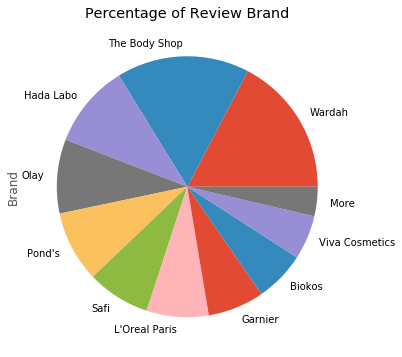

In [21]:
plt.figure(figsize = (8,8))
pd.Series(top_count, index = top_index).plot(kind='pie',figsize=(8,6))
plt.title('Percentage of Review Brand')
plt.ylabel('Brand')
plt.show()

**Average Rating per Brand**

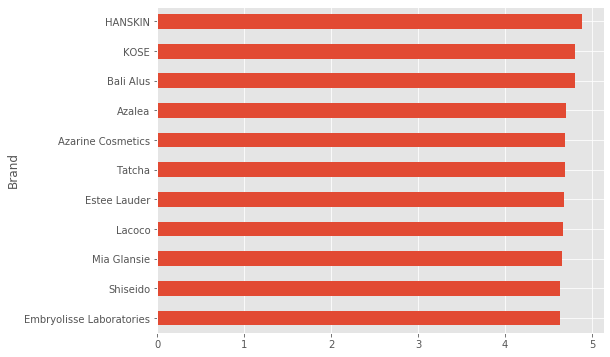

In [22]:
review.groupby('Brand').mean()['Rating'].sort_values(ascending = False)[:11].sort_values().plot(kind='barh',figsize=(8,6))

In [23]:
review.groupby('Brand').mean()['Rating'].sort_values(ascending = False)[:11]

Brand
HANSKIN                     4.888889
Bali Alus                   4.800000
KOSE                        4.800000
Azalea                      4.700000
Azarine Cosmetics           4.690000
Tatcha                      4.685714
Estee Lauder                4.680000
Lacoco                      4.666667
Mia Glansie                 4.650000
Shiseido                    4.636364
Embryolisse Laboratories    4.632653
Name: Rating, dtype: float64

**Age reviewers**

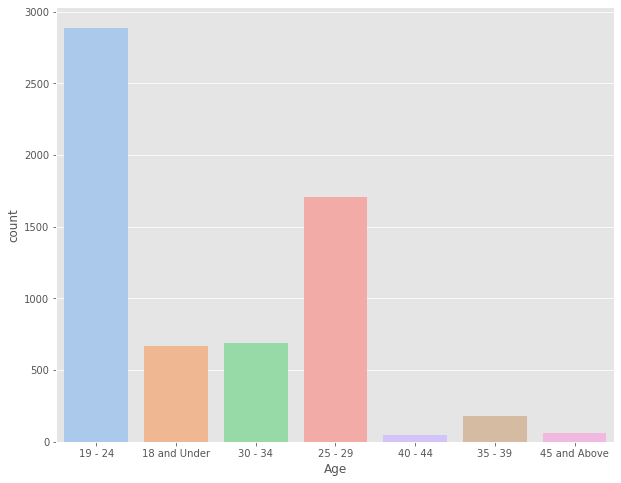

In [24]:
figsize = plt.figure(figsize=(10,8))
sns.countplot(review.drop_duplicates('UserName')['Age'], palette = 'pastel')

**Insight:**
Kebanyakan reviewers berada di umur 19-24 tahun

**Rating Count for All Product**

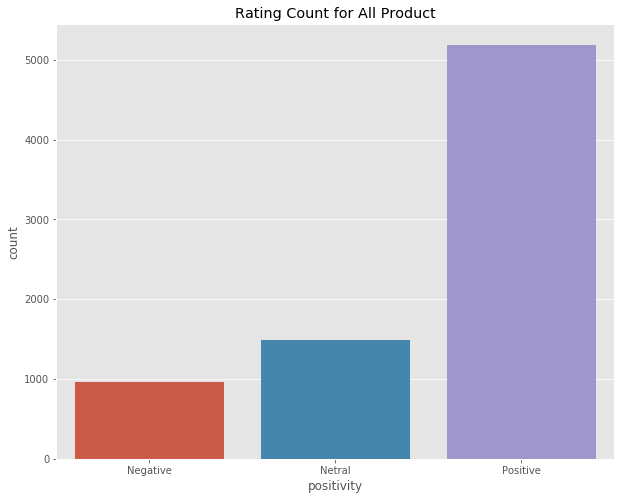

In [22]:
plt.figure(figsize = (10,8))
sns.countplot(review['positivity'])
plt.xticks([0, 1, 2], ['Negative', 'Netral', 'Positive'])
plt.title('Rating Count for All Product')
plt.show()

In [31]:
review['positivity'].value_counts().index

Int64Index([1, 0, -1], dtype='int64')

In [32]:
review['positivity'].value_counts().values

array([5190, 1488,  958], dtype=int64)

**Insight:** Data imbalanced

# Text Preprocessing

- punctuation
- lematisasi
- stop words
- regular expression

## Cleaning Tahap 1

In [23]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [24]:
## Lematisasi
from nltk.stem.wordnet import WordNetLemmatizer #untuk Bahasa Inggris
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #untuk Bahasa Indonesia
## stopwords
from nltk.corpus import stopwords
## punctuation
import string
import re

#-----------
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [25]:
stop = list(set(stopwords.words('indonesian'))) 
stop.extend(review['Brand'].apply(lambda x : x.lower()).unique().tolist())
punc = set(string.punctuation)
 
#lemmatisasi untuk bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [26]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("","",string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = text.split()
    text = [stemmer.stem(word) for word in text]
    text = [word for word in text if word not in stop] 
    return ' '.join(text)

In [27]:
review['Review'] = review['Review'].astype('str')

In [28]:
review['Review'].loc[0]

'udah pake 6 botol , teksturnya unik lebih kaya tekstur gel yang ga terlalu kentel. di wajah lembab bangt dan ga lengket, harga masih tergolong murah banget dih dengan kualitas se keren ini,tapi sebel banget sama kemasannya aga jadul dan gampang tumpah'

In [29]:
clean_text(review['Review'].loc[0])

'udah pake botol tekstur unik kaya tekstur gel ga kentel wajah lembab bangt ga lengket harga golong murah banget dih kualitas keren initapi sebel banget kemas aga jadul gampang tumpah'

In [30]:
review['clean_text'] = review['Review'].apply(clean_text)

**WordCloud**

In [39]:
from wordcloud import WordCloud 

In [40]:
Wardah = review[review['Brand'] == 'Wardah'].sort_values(by=['PostDate'],ascending=False) 

In [41]:
Wardah['positivity'].value_counts()

 1    344
 0    136
-1     90
Name: positivity, dtype: int64

In [42]:
def word_frequency(text):
    wordList = text.split()
    # generate frequencey of word to dictionary 
    wordFreq = {word : wordList.count(word) for word in wordList}
    return wordFreq

In [43]:
def wordcloud_freq(word_freq,title,figure_size = (10,5)):
    wordcloud.generate_from_frequencies(word_freq)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show

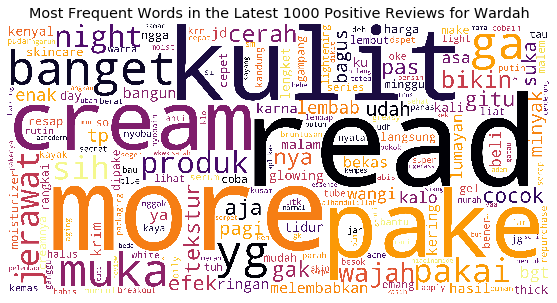

In [44]:
Wardah_pos = " ".join(Wardah[Wardah['positivity'] == 1]['clean_text'][0:1000])
Wardah_pos = word_frequency(Wardah_pos)
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='inferno',
                     background_color='white')
wordcloud_freq(Wardah_pos, 'Most Frequent Words in the Latest 1000 Positive Reviews for Wardah')

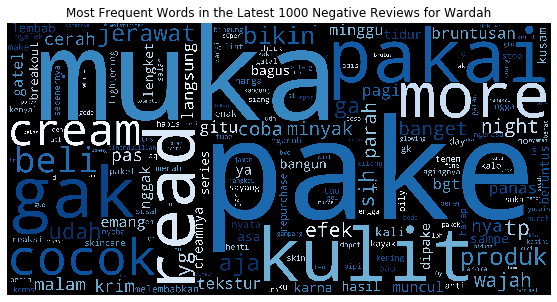

In [5]:
Wardah_neg = " ".join(Wardah[Wardah['positivity'] == -1]['clean_text'][0:1000])
Wardah_neg = word_frequency(Wardah_neg)
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='Blues',
                     background_color='black')
wordcloud_freq(Wardah_neg, 'Most Frequent Words in the Latest 1000 Negative Reviews for Wardah')

# Export

In [46]:
review.to_csv(r'D:\final project\DataBase\Output\Output For Cleaning ver 2\review_clean_base.csv')